In [1]:
# regression : 회귀
# 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

'''
[Step 1] 데이터 준비 - read_csv() 함수로 자동차 연비 데이터셋 가져오기
'''
# CSV 파일을 데이터프레임으로 변환
#url=
#df = pd.read_csv(url, header=None)
df = pd.read_csv('./data/auto-mpg.csv', header=None)

# 열 이름 지정
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

# 데이터 살펴보기
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [2]:
'''
[Step 2] 데이터 탐색
'''

# 데이터 자료형 확인
df.info()

# horsepower object ==> 없애던가, 결측치를 채우던가.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
# 데이터 통계 요약정보 확인
df.describe()

# 평균(mean)과 중위수(50%)의 값 차이가 많이 난다면 이상치가 많다고 보고 이상치를 처리해야함.

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
# 결측치 확인
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
name            0
dtype: int64

In [5]:
# 중복 데이터 확인
df.duplicated().sum()

np.int64(0)

In [ ]:
# 결측치가 아니지만, 데이터 타입이 일치하지 않은 데이터들을 찾아서 na로 변경 - 일괄처리를 위해서 
# horsepower 
df.horsepower.unique()

In [11]:
# 결측치가 아니지만, 데이터 타입이 일치하지 않은 데이터들을 찾아서 na로 변경 - 일괄처리를 위해서 
# horsepower 
df.horsepower.unique()
# df.horsepower.astype(float) #ValueError: could not convert string to float: '?'
# ==> 결측치가 ? 이것 하나만 있는게 아니라면? 어떻게? 
df.loc[100, 'horsepower'] ='<<'  #임의로 데이터 변경
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '<<', '167.0', '94.00', '107.0', '230.0',
       '49.00', '75.00', '91.00', '122.0', '67.00', '83.00', '78.00',
       '52.00', '61.00', '93.00', '148.0', '129.0', '96.00', '71.00',
       '98.00', '115.0', '53.00', '81.00', '79.00', '120.0', '152.0',
       '102.0', '108.0', '68.00', '58.00', '149.0', '89.00', '63.00',
       '48.00', '66.00', '139.0', '103.0', '125.0', '133.0', '138.0',
       '135.0', '142.0', '77.00', '62.00', '132.0', '84.00', '64.00',
       '74.00', '116.0', '82.00'], dtype=object)

In [ ]:
# horsepower 결측치를 NaN 으로 변경하기
# is_continue = True
# while is_continue:
#     try:
#         df.horsepower.astype(float)
#     except Exception as e:
#         temp =e.__str__().split(':')[-1].strip().replace("'","")
#         df.horsepower = df.horsepower.replace(temp, pd.NA)
#     else:
#         is_continue = False

In [ ]:
# horsepower 결측치를 NaN 으로 변경하기1 ==> Dtype object에서 float64로 변경
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce')
# horsepower 결측치를 NaN 으로 변경하기2
# df.horsepower = df.horsepower.apply(lambda x : x if isinstance(x, float) else pd.NA)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [19]:
df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [ ]:
# 결측치 데이터 처리방안
# 1. 결측치가 있는 데이터의 행들을 전부 출력
df[df.horsepower.isna()]
# 삭제할지 말지를 결정할때 주변데이터도 같이 고려할 것. 
# ==> ex.제거할때 cylinders 에 4인 데이터가 너무 사라질수도 있고, 6을 가진 행이 많이 없다면 삭제하면 또 통계?내기 힘들수 있음


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
100,18.0,6,250.0,NaN,3021.0,16.5,73,1,ford maverick
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [94]:
# 결측치 제거 
# df[~df.horsepower.isna()]   
# ==> 상기  ~ 은 not의 의미 / 결측치가 제거된 데이터만 보는 것으로 다시 df2로 받으면 결측치 제거된 데이터만 받을 수 있음.
df=df.dropna()   #na의 모든 행을 삭제하므로, horsepower 말고 다른 곳에도 있다면 모두 삭제될 수 있으므로 조심할것.
# 결측치를 제거하면 index가 중간중간 비어있기 때문에 재정렬 reset
df=df.reset_index(drop=True)  #drop=True하면 기존 index가 index 컬럼으로 들어가지 않고 삭제됨
df


,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0
...,...,...,...,...
386,27.0,4,86.0,2790.0
387,44.0,4,52.0,2130.0
388,32.0,4,84.0,2295.0
389,28.0,4,79.0,2625.0


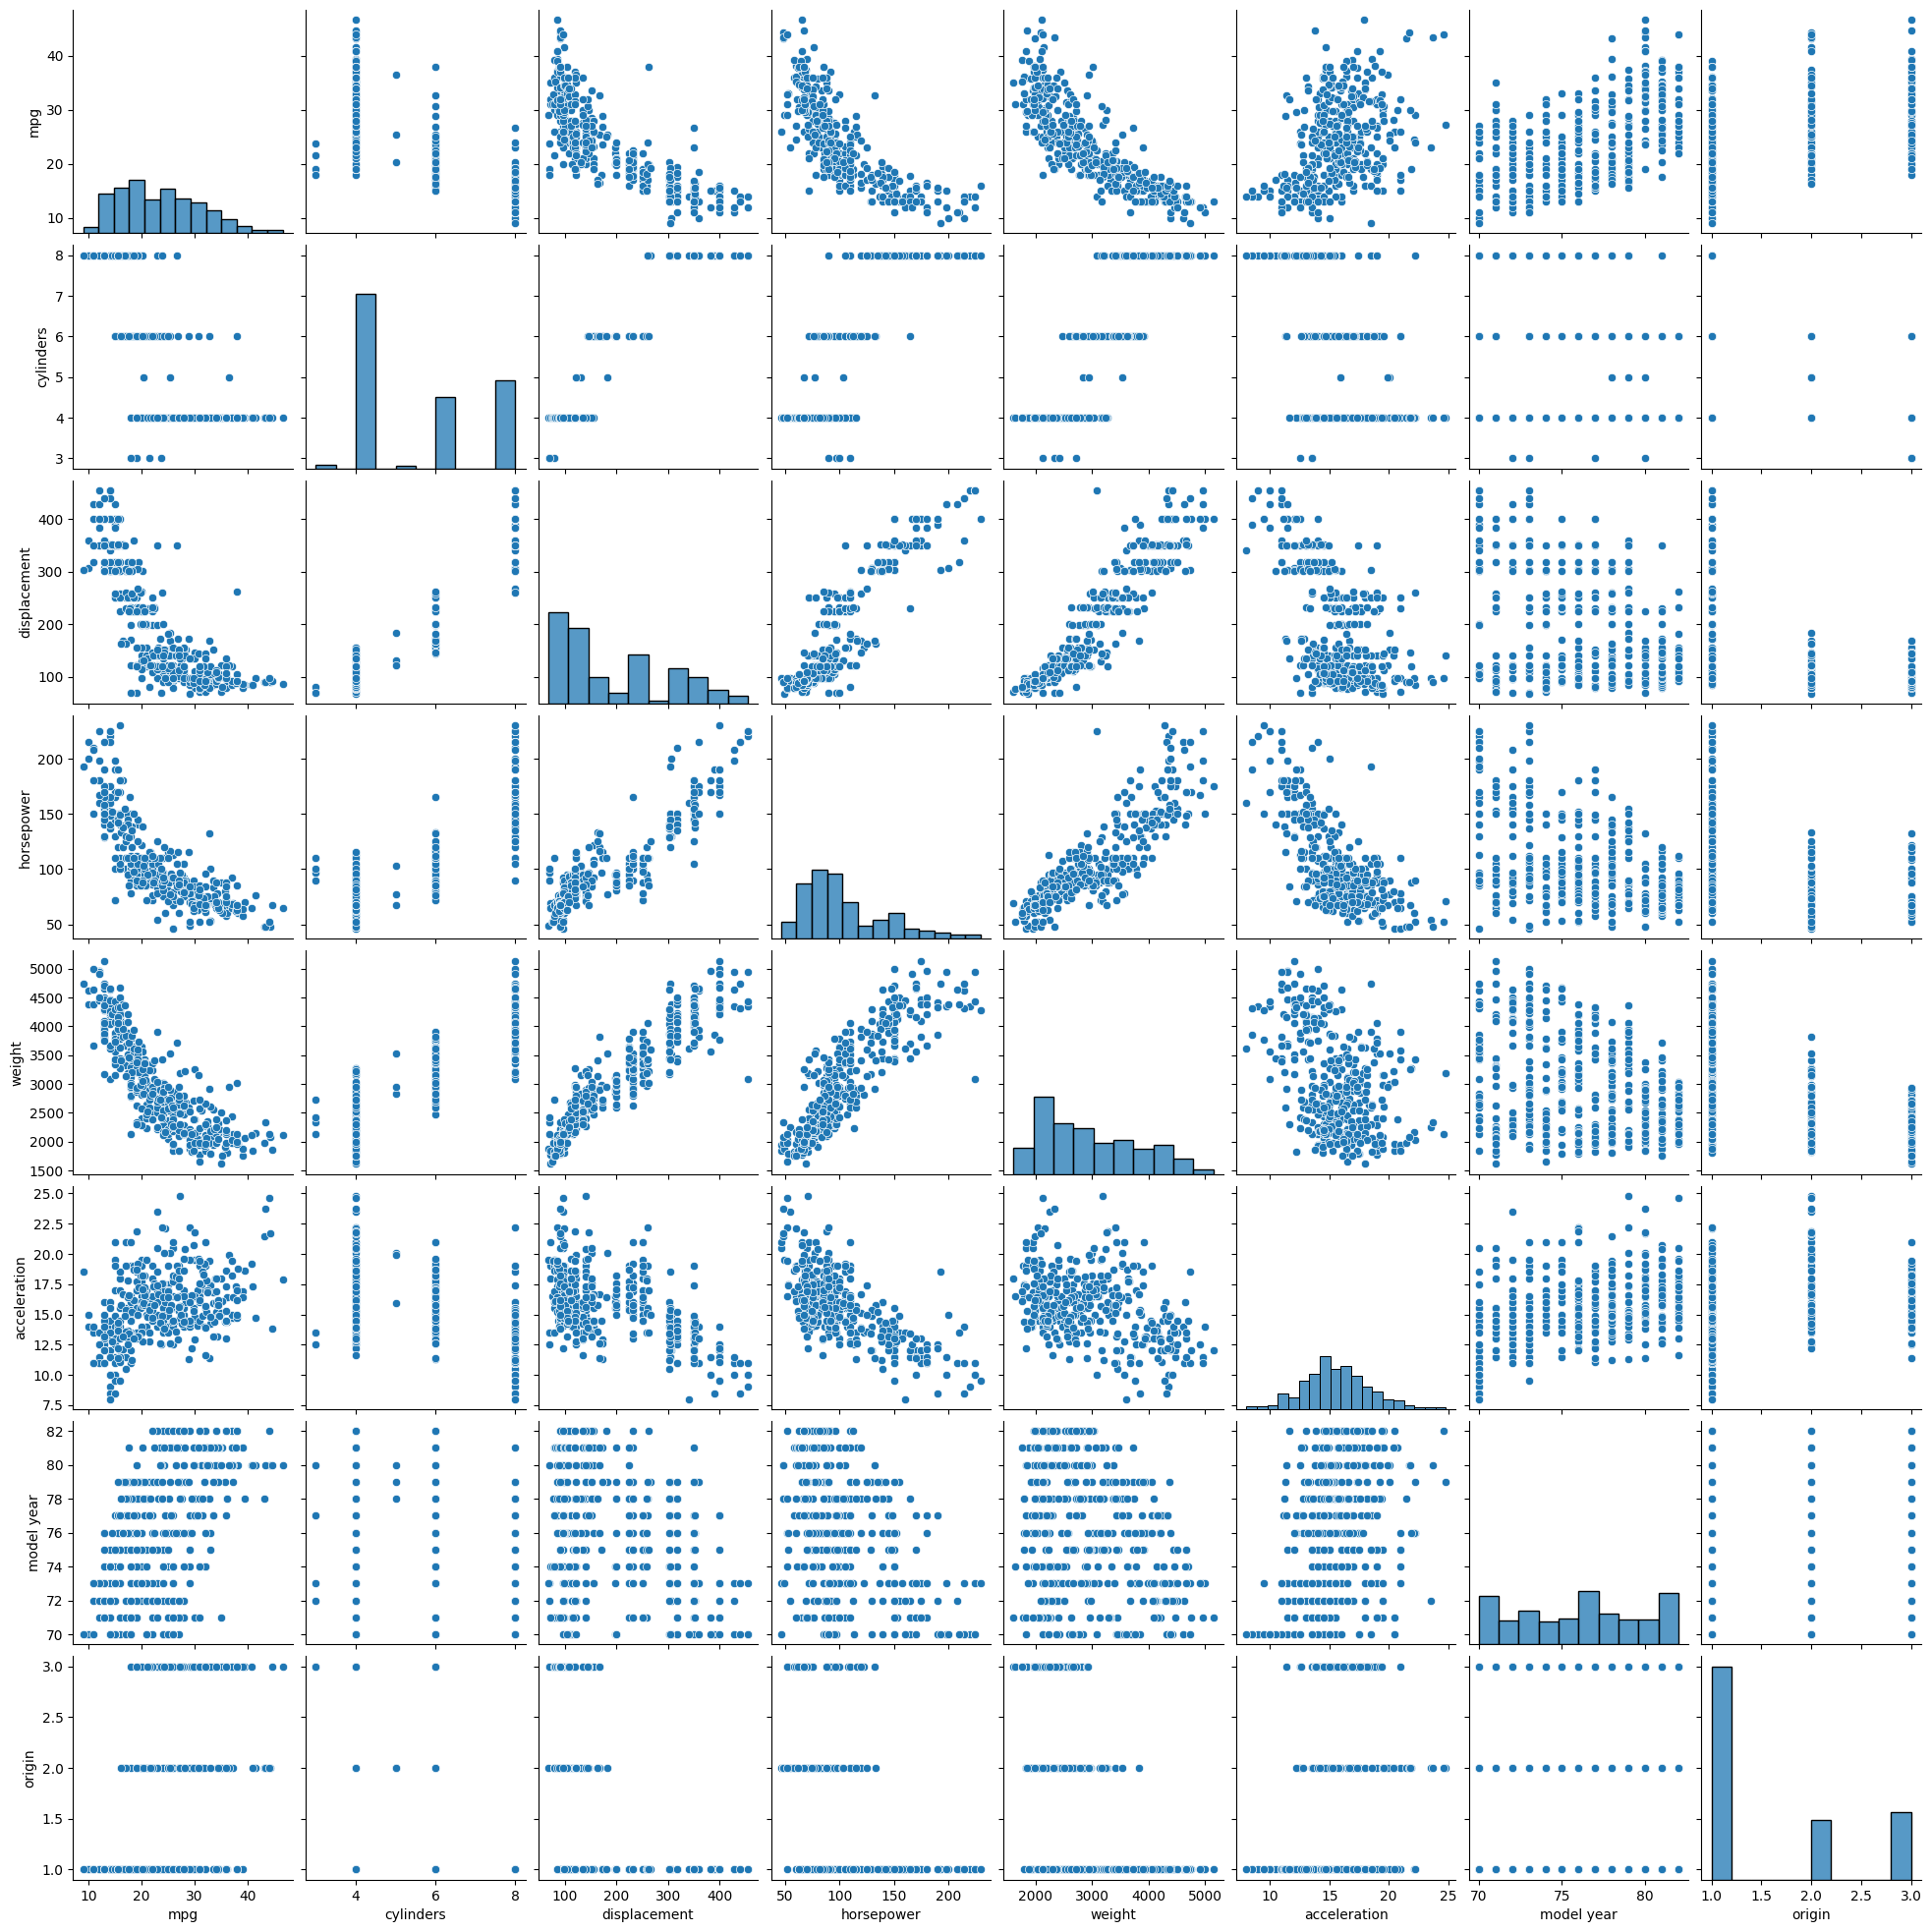

In [ ]:
# seaborn pairplot  산점도
sns.pairplot(df);

# 상관관계가 높은 것들이 내가 찾고자 하는게 아닐 때는 그것을 없애는게 좋다.
# 머신러닝에서는 상관관계가 높은 것들을 우선적으로 학습? 하기 때문에

In [50]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(numeric_only=True)
corr

# 상관관계가 높은 것들이 내가 찾고자 하는게 아닐 때는 그것을 없애는게 좋다.
# 머신러닝에서는 상관관계가 높은 것들을 우선적으로 학습? 하기 때문에

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.779862,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.843625,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.898376,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.779862,0.843625,0.898376,1.000000,0.864800,-0.689083,-0.417697,-0.456364
weight,-0.831741,0.896017,0.932824,0.864800,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689083,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.417697,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.456364,-0.581024,0.205873,0.180662,1.000000


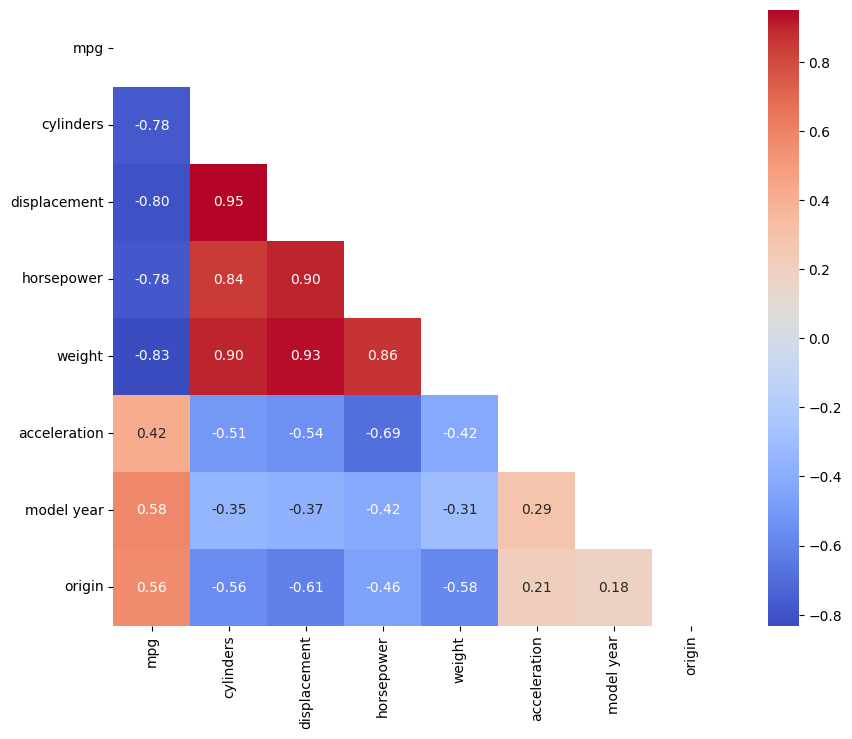

In [51]:
# 상관계수 분석 - 히트맵
mask = np.triu(np.ones_like(corr, dtype=bool))   # 마스크 생성 (상단 트라이앵글을 숨김)

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', 
            annot=True, fmt=".2f", cbar=True, square=True)
plt.show()

In [85]:
'''
[Step 3] 데이터 전처리
'''

# horsepower 열의 고유값 확인
df['horsepower'].unique()          

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [ ]:
# horsepower 열의 자료형 변경 (문자열 ->숫자)

# df['horsepower'] = df['horsepower'].replace('?', np.nan)      # '?'을 np.nan으로 변경
# df['horsepower'] = df['horsepower'].astype('float')           # 문자열을 실수형으로 변환

df.describe()                                   

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
# 결측치 제거
# print(df['horsepower'].isnull().sum())
# df_nan = df.dropna(subset=['horsepower'], axis=0)                 
# print(df_nan['horsepower'].isnull().sum())

NameError: name 'df_nan' is not defined

In [12]:
# 결측치 대체
print(df['horsepower'].isnull().sum())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())               
print(df['horsepower'].isnull().sum())

6
0


In [54]:
# 상관계수 분석 - 데이터프레임
corr = df.corr(numeric_only=True)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.779862,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.843625,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.898376,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.779862,0.843625,0.898376,1.000000,0.864800,-0.689083,-0.417697,-0.456364
weight,-0.831741,0.896017,0.932824,0.864800,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689083,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.417697,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.456364,-0.581024,0.205873,0.180662,1.000000


In [56]:
# 수치형 데이터 선택
df.describe().columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin'],
      dtype='object')

In [84]:
'''
[Step 3] 속성(feature 또는 variable) 선택
'''

# 분석에 활용할 열(속성)을 선택 (연비, 실린더, 출력, 중량)  
df = df[['mpg', 'cylinders', 'horsepower', 'weight']]
df.head() 

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


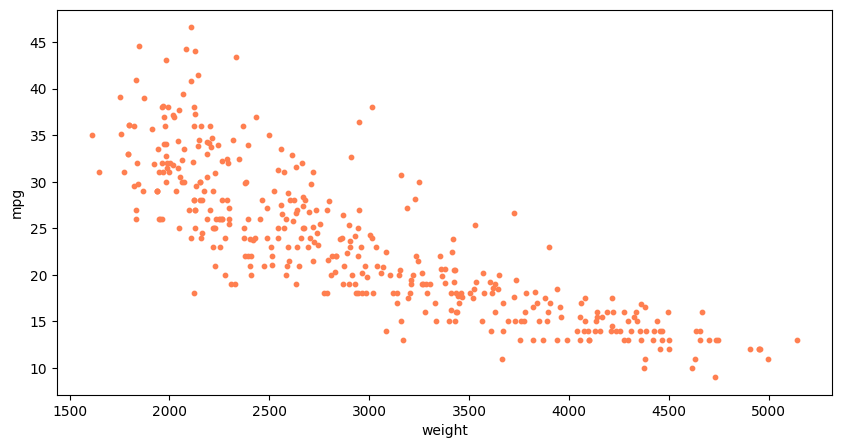

In [58]:
### 종속 변수 Y인 "연비(mpg)"와 다른 변수 간의 선형관계를 그래프(산점도)로 확인
# Matplotlib으로 산점도 그리기
df.plot(kind='scatter', x='weight', y='mpg',  c='coral', s=10, figsize=(10, 5))
plt.show()

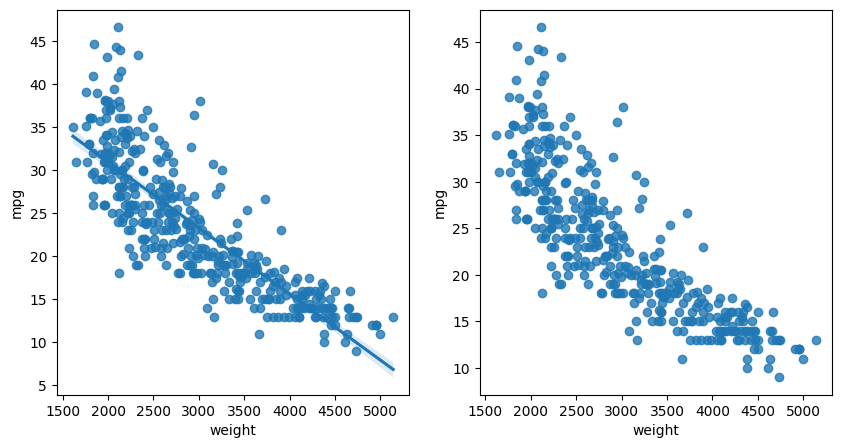

In [59]:
# seaborn으로 산점도 그리기
fig = plt.figure(figsize=(10, 5))   
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x='weight', y='mpg', data=df, ax=ax1)                 # 회귀선 표시
sns.regplot(x='weight', y='mpg', data=df, ax=ax2, fit_reg=False)  #회귀선 미표시
plt.show()

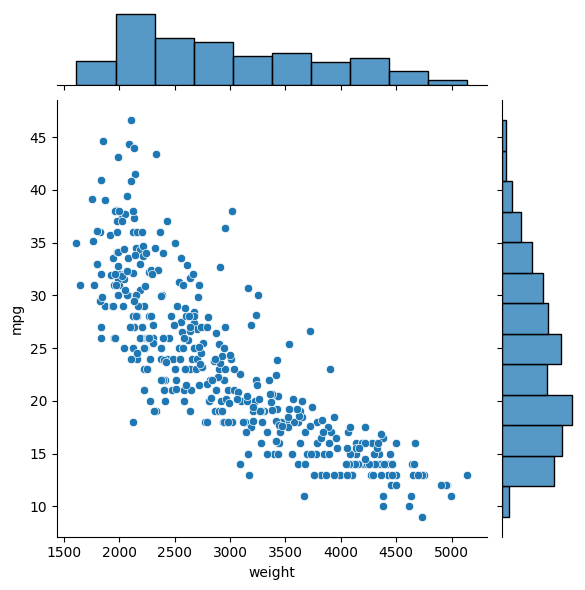

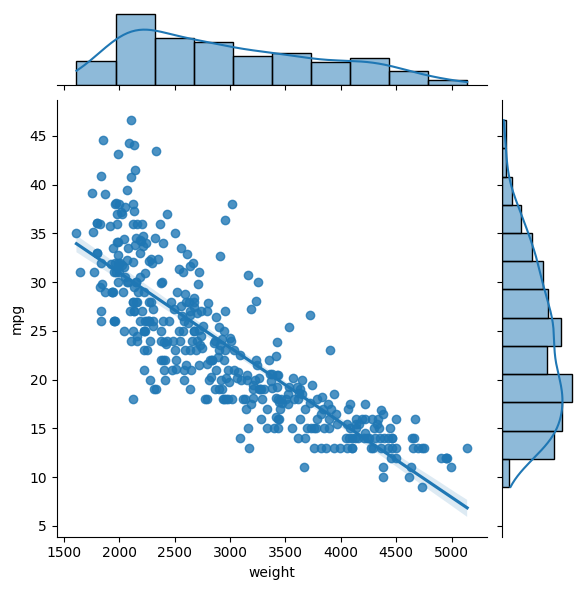

In [63]:
# seaborn 조인트 그래프 - 산점도, 히스토그램

sns.jointplot(x='weight', y='mpg', data=df);             # 회귀선 없음
sns.jointplot(x='weight', y='mpg', kind='reg', data=df);  # 회귀선 표시

In [ ]:
'''
Step 4: 데이터셋 구분 - 훈련용(train data)/ 검증용(test data)
'''

# 속성(변수) 선택
X=df[['weight']]  #독립 변수 X  (학습시킴) sklearn 계열은 항상 2차원 데이터를 요구하기 때문에 [[]] 이렇게 기재
y=df['mpg']       #종속 변수 Y  (학습의 결과, 정답)

# train data 와 test data로 구분(7:3 비율) => 하는 이유? 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,               #독립 변수 
                                                    y,               #종속 변수
                                                    test_size=0.3,   #검증 30%
                                                    random_state=10) #랜덤 추출 값 

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test))
print('total data 개수: ', len(X))

train data 개수:  278
test data 개수:  120
total data 개수:  398


In [ ]:
'''
Step 5: 단순회귀분석 모델 - sklearn 사용
sklearn 계열의 데이터는 항상 2차원을 요구. demension 2

'''

# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모델 객체 생성
lr = LinearRegression()   

# train data를 가지고 모델 학습 : fit 학습시키고 적용
lr.fit(X_train, y_train)

# 학습을 마친 모델에 test data를 적용하여 결정계수(R-제곱) 계산
r_square = lr.score(X_test, y_test)    
print('R^2 결정계수: ', r_square)   #결정계수 1이되면 완벽 (0과1사이 결정계수 값을 알려줌.)

R^2 결정계수:  0.689363809315209


In [ ]:
# 결정계수(평균대비 오차를 보는것?)

# 예시
# 학생들의 시험점수를 예측
# 1. 참고할 정보가 없다면.. 모든 학생이 평균 점수를 받을 거라고 예측
# 2. 실제는 평균보다 높거나 낮다. 그래서 오차가 발생. 결정계수의 기준선
# 선형모델의 예측
    # 정보 : 공부시간 추가 정보   가 있으면 공부시간과 시험점수와의 관계를 선형회귀 모델로 만듦
# 결정계수(평균대비 오차를 보는것?)가 0이면 그냥 평균을 출력하는 의미 밖에 없음.


In [ ]:
# 회귀식의 기울기
print('기울기 a: ', lr.coef_)

# 회귀식의 y절편
print('y절편 b', lr.intercept_)


# y = aX + b
# y= -0.0076554 X + 46.60365052224634

기울기 a:  [-0.0076554]
y절편 b 46.60365052224634


In [72]:
# 모델에 test data 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
y_hat = lr.predict(X_test)

# 오차 계산
test_preds = pd.DataFrame(y_test)
test_preds.columns = ['y_test']
test_preds['y_hat'] = y_hat
test_preds['squared_error'] = (test_preds['y_hat'] - test_preds['y_test'])**2  #음수를 없애려고 제곱함.
test_preds

#absolute_error도 있지만, squared_error를 더 많이 사용함

,y_test,y_hat,squared_error
331,33.8,30.182824,13.083965
111,18.0,30.343587,152.364137
350,34.7,29.646946,25.533357
205,28.0,30.106270,4.436372
56,26.0,31.637349,31.779704
...,...,...,...
17,21.0,26.799138,33.630001
225,17.5,19.656652,4.651150
223,15.5,14.910306,0.347739
59,23.0,29.348385,40.301995


In [ ]:
# 평균 제곱 오차
mse = test_preds['squared_error'].mean()
print('mse: ', mse)

mse:  17.898336128759958


In [ ]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_hat, y_test)

#==> 상기 셀과 동일한 결과 나옴.

17.898336128759958

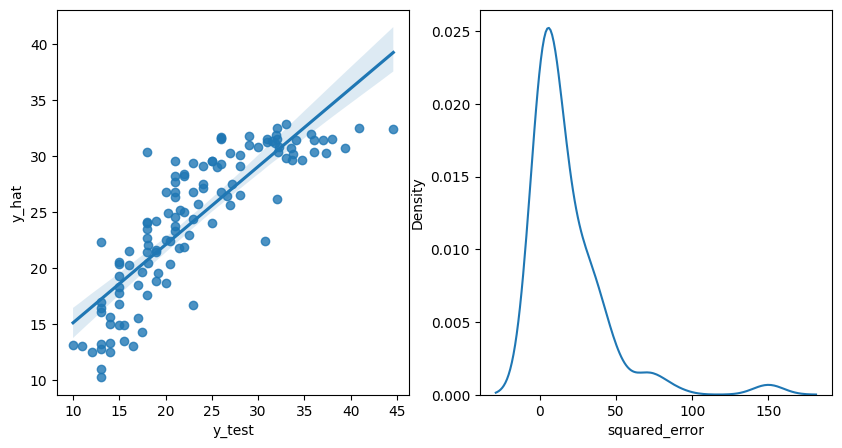

In [ ]:
# 오차 분석
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
sns.regplot(x='y_test', y='y_hat',  data=test_preds, ax=axes[0]);  
sns.kdeplot(x='squared_error',  data=test_preds, ax=axes[1]); 


#x='y_test' 실제값??, y='y_hat' 예측값??
#오른쪽 그래프 : 봉우리가 높을 수록 오차가 크다...?? 
#               가장 높은 봉우리 값(0.025)에서 squared_error 값이 0에 가까울수록 좋다... 봉우리 오른쪽으로 갈수록 급격히 낮아질수록 좋은 모델


In [ ]:
# y_bar : 모든 y값의 평균
# y_hat : 모델이 예측한 i번째 데이터의 값(예측)
# yi : i번째 데이터의 정답
# 결정계수 = 1 - SSR/SST  (1에서 오차비율을 뺀 값 ==> 모델이 설명해낸 변동성의 비율 ==> 1에 가까워지면 모델이 정확하게 맞춤)
# SSR : 잔차제곱합 = sum((yi - y_hat)**2)  값이 작을수록 모델이 정확 (모델이 설명하지 못한 변동량)
# SST : 총 제곱합 = sum((yi - y_bar)**2) 단순 평균값으로 데이터의 흩어진 정도를 표현 (데이터의 총 변동량)
# 결정계수가 0.85라면, 85는 예측하고 나머지 15는 예측하지 못한다고 해석할 수 있음.

In [ ]:
#선형회귀는 단순히 MSE (['squared_error'].mean()), MSA(['absoluted_error'].mean())로 평가를 하면... 
   # 어느정도 좋은 모델인지 알수가 없다. 기준을 모르기 때문에.
#그래서 결정계수를 통해서 확률로 알 수 있다.

In [ ]:
#실습    ==========> 7.1_copy1.ipynb
#결측치를 제거했을 때와 대처했을 때
#독립변수를 weihgt가 아닌 다른 요소로 했을 때, 모델의 성능을 측정
#정답과 선형관계가 뚜렷하거나 선형관계가 있다고 판단되는 변수를 선정
#학습용 / 테스트용 데이터를 8:2로 분류
#결정계수와 MSE 두개를 출력하고,
#예제처럼 오차분석을 시각화.

7.1_copy1.ipynb